# kNN Regression

### 1. Import Libraries

In [24]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap

### 2. Create Dataset - kNN Regression

<IPython.core.display.Javascript object>


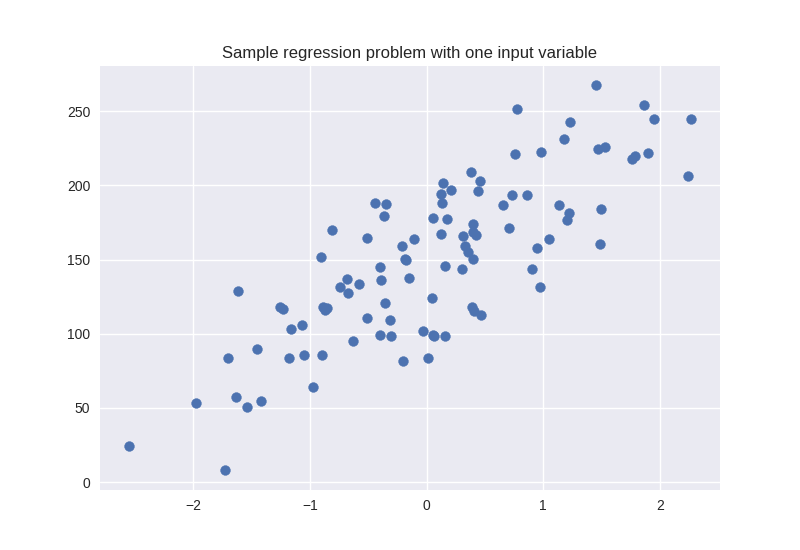

In [25]:
# synthetic dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

### 3. Train-test split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 42)
print ('Training Set Dimensions : ', X_train.shape)
print ('Test Set Dimensions : ', X_test.shape)

Training Set Dimensions :  (75, 1)
Test Set Dimensions :  (25, 1)


### 4. knn Classifier

In [29]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors = 5)
knnreg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

### 5. R - Squared

In [30]:
knnreg.predict(X_test)
# Test set accuracy
acc_test = knnreg.score(X_test, y_test)
acc_train = knnreg.score(X_train, y_train)
print ('R squared Training: ', acc_train)
print ('R squared Testing: ', acc_test)

R squared Training:  0.683507446076
R squared Testing:  0.608504071979


### 6. R-squared Plot as a function of n_neighbors

<IPython.core.display.Javascript object>


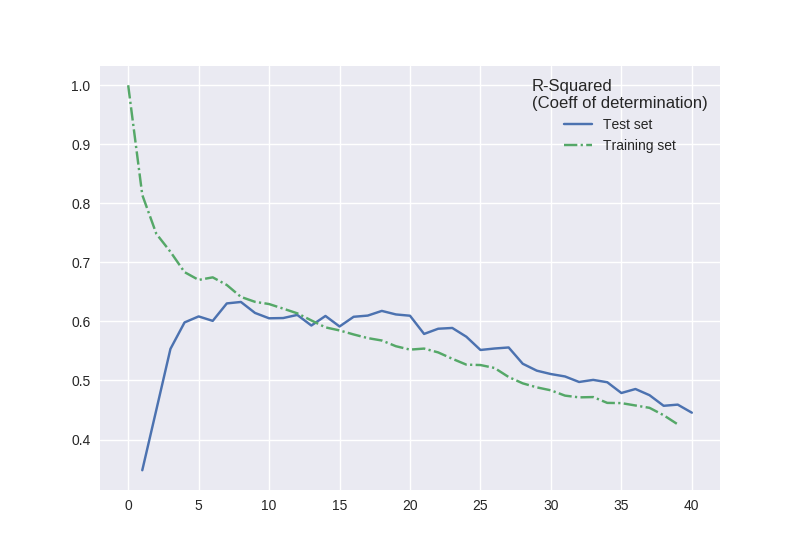

In [31]:
acc_test = []
acc_train = []
x_axis = np.array(range(1,41))
for i in x_axis:
    knnreg = KNeighborsRegressor(n_neighbors = i)
    knnreg.fit(X_train, y_train)
    acc_test = np.append(acc_test, knnreg.score(X_test, y_test))
    acc_train = np.append(acc_train, knnreg.score(X_train, y_train))
    
fig = plt.figure()
plt.plot(x_axis, acc_test,'-', acc_train,'-.')
plt.legend(title = 'R-Squared\n(Coeff of determination)', labels = ['Test set','Training set'])
plt.show()
# plt.xlim(x_axis);

<IPython.core.display.Javascript object>


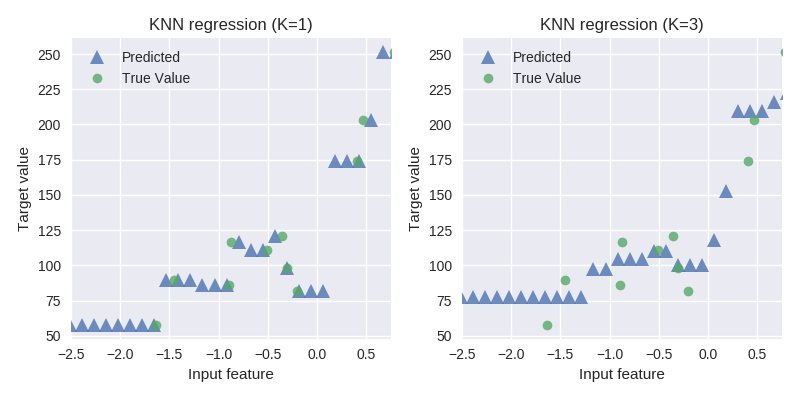

In [32]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize = 10,
                 label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True Value', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

## Change in Complexity of Model as a function of K

<IPython.core.display.Javascript object>


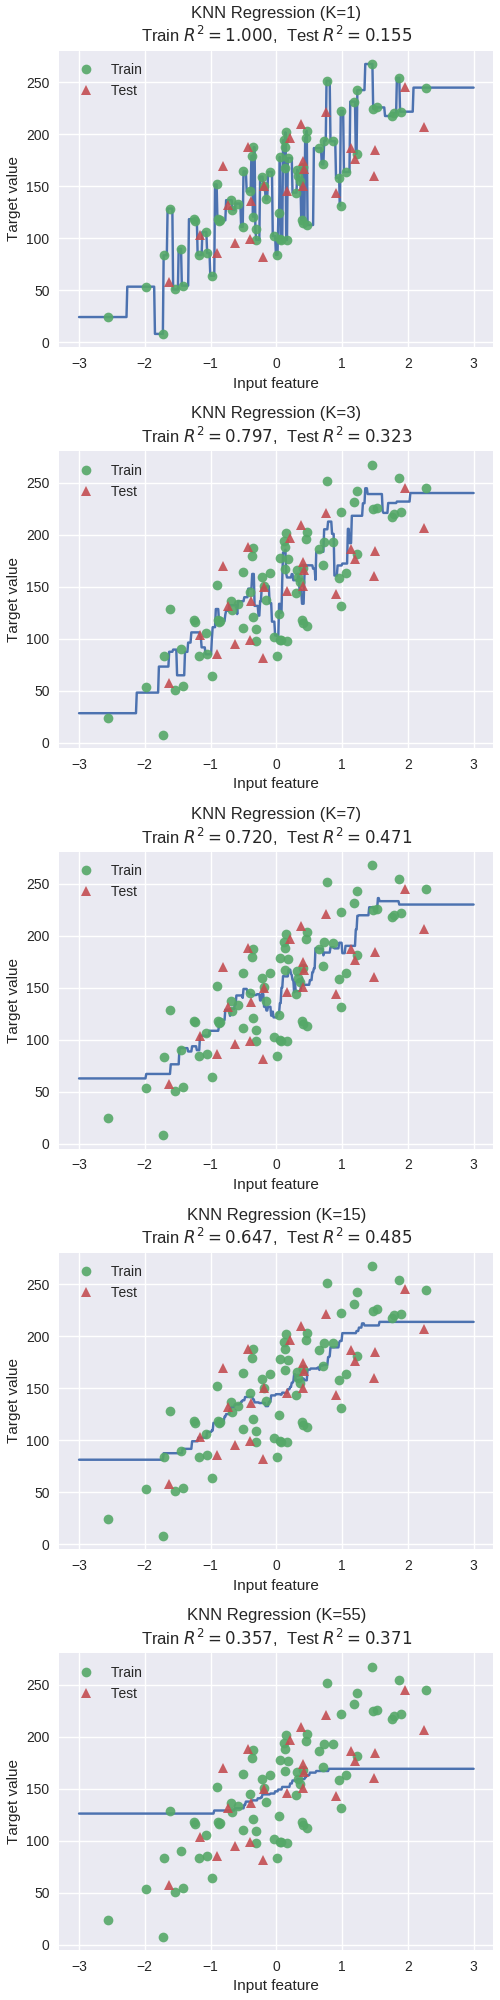

In [17]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
